#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

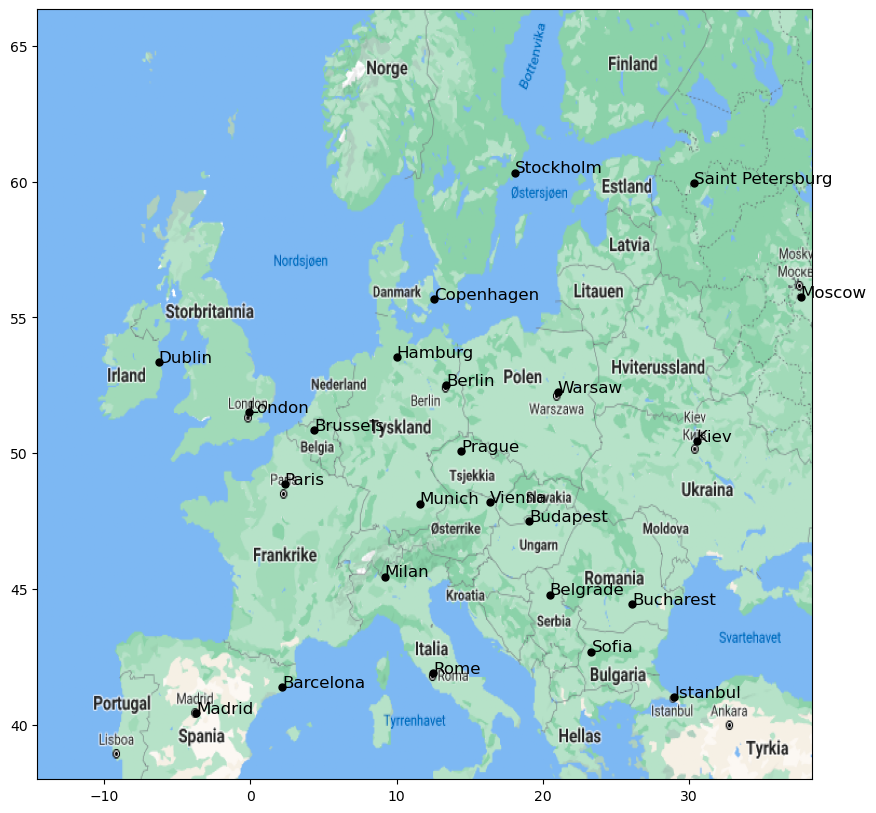

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


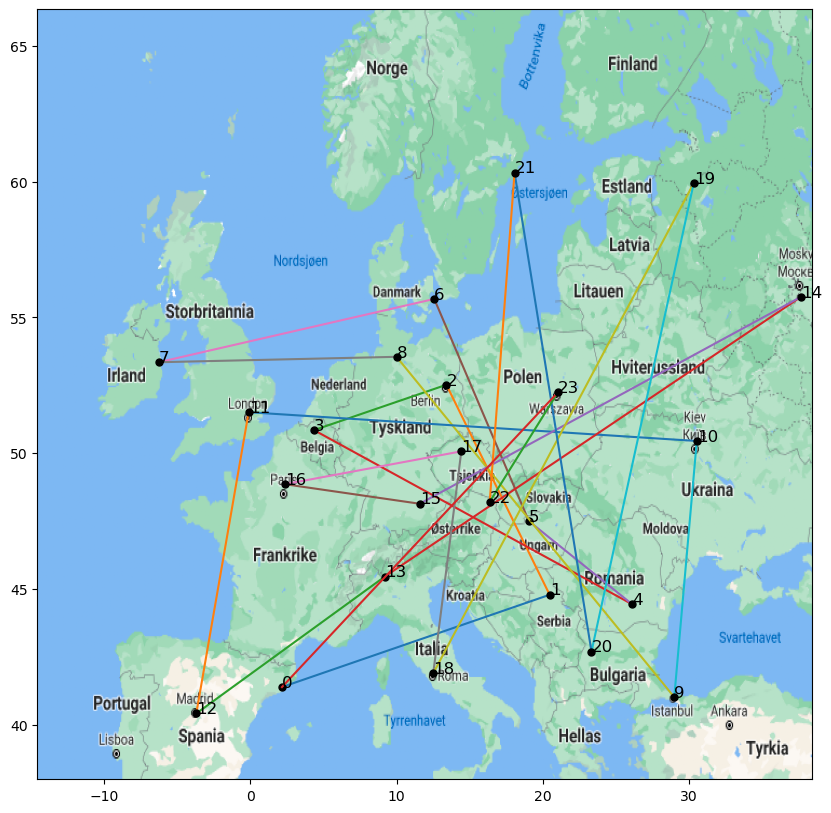

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [5]:
# Implement the algorithm here

import csv
import time
import itertools

file = open("european_cities.csv", "r")

# Creates a way of finding city distances using indexing with city names.
cities_list = list(csv.reader(file, delimiter=";"))
index_dict = {}
counter = 0
for city_name in cities_list[0]:
    index_dict[city_name] = counter
    counter += 1
cities_dist = cities_list[1:]
# Example index: print(cities_dist[index_dict["Bucharest"]][index_dict["Berlin"]])

# Function used to return the total distance in a permutation.
def find_total_distance(permutation, cities_dist, index_dict) -> int:
    counter = 0
    cities_order = ""
    for i in range(len(permutation)):
        if i < (len(permutation) - 1):
            city1 = permutation[i]
            city2 = permutation[i + 1]
            distance_found = float(cities_dist[index_dict[city1]][index_dict[city2]])
            counter += distance_found
    counter += float(cities_dist[index_dict[permutation[0]]][index_dict[permutation[-1]]])  # First and last city

    return counter

# Performs an exhaustive search on the permutation, measures time, and plots the tour.
def exhaustive_search(permutations, cities_dist, index_dict):
    # Starts the program timer
    start_time = time.time()

    # Performs exhaustive search.
    total_distance = 99999999999999999
    best_perm = ...
    for perm in city_permutations:
        current_distance = find_total_distance(perm, cities_dist, index_dict)
        if current_distance < total_distance:
            total_distance = current_distance
            #print(total_distance)
            best_perm = perm
    print(f"Found best permutation {best_perm} of distance: {total_distance}")

    # Measuring the time.
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time of exhaustive search: {elapsed_time} seconds")

    # Plots the visualization of the permutation.
    plot_plan(best_perm)
    

Found best permutation ('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels') of distance: 5018.8099999999995
Elapsed time of exhaustive search: 0.004000186920166016 seconds


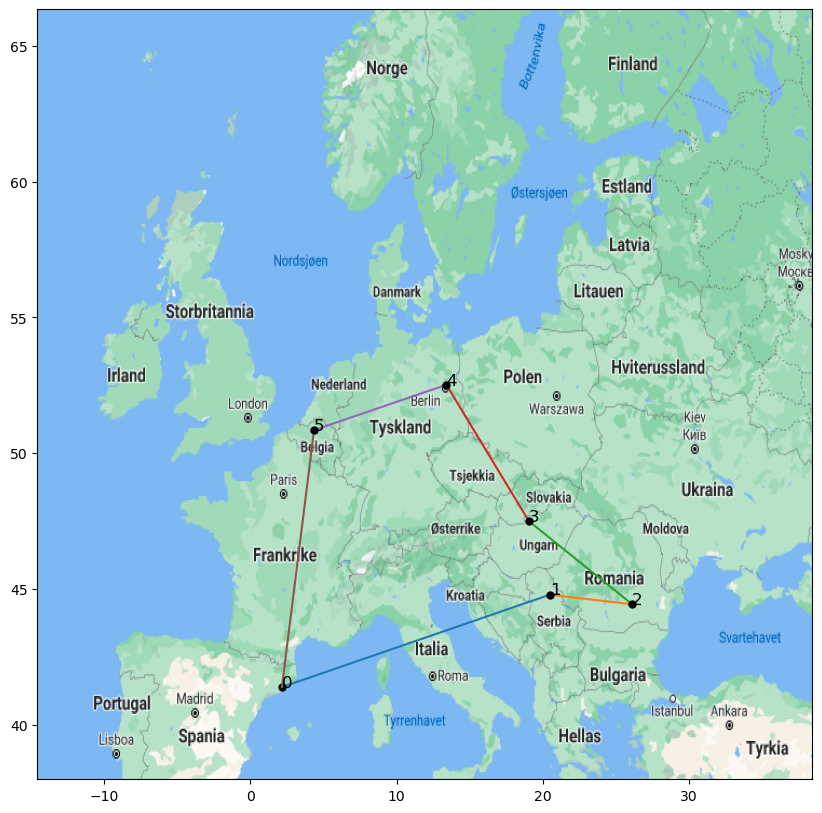

In [150]:
### Performs exhaustive search on 6 cities, measure time taken, and plots.

# Finds a permutation of 6 cities, and performs an exhaustive search.
city_permutations = itertools.permutations(cities_list[0][0:6])
exhaustive_search(city_permutations, cities_dist, index_dict)

Found best permutation ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin') of distance: 7486.309999999999
Elapsed time of exhaustive search: 13.852030038833618 seconds


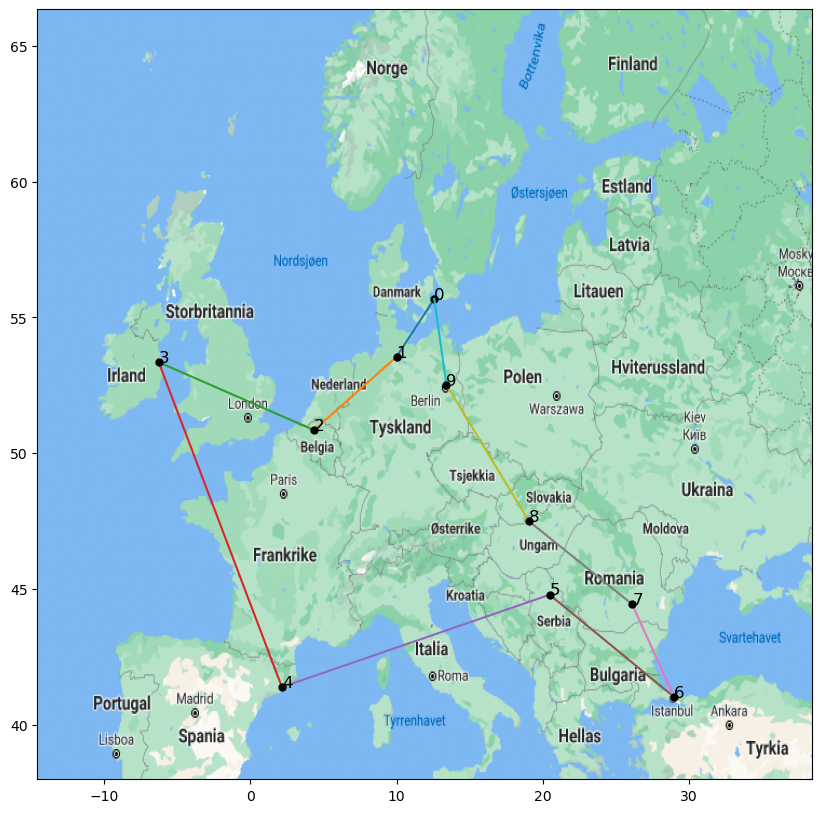

In [249]:
### Performs exhaustive search on 10 cities, measure time taken, and plots.

# Finds a permutation of 10 cities, and performs an exhaustive search.
city_permutations = itertools.permutations(cities_list[0][0:10])
exhaustive_search(city_permutations, cities_dist, index_dict)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

#### Answer

The shortest tour of the first 10 cities had a total distance of 7486.3 kilometres, and spanned out in the following sequence: Istanbul - Hamburg - Dublin - Copenhagen - Budapest - Bucharest - Brussels - Berlin - Belgrad - Barcelona.

This calculation takes approximately 15 seconds to perform.

##### The time it would take to perform an exhaustive search on all 24 cities:

If we go by the notion of time complexity with big O notation. The travelling salesman problem with a time complexity of O(N!) will with 10 cities have a worst case of 10!, approximately 3.6+e6 searches. 24 cities will yield a worst case of 24!, approximately 6.2e+24. We can then take our worst case time of 15 seconds, multiply with (6.2e+24 / 3.6e+6) = 1.7e+18, resulting in a worst case time of 15 * 1.7e+18 = 2.6e+19 seconds. It is safe to say that this calculation would prove impossible to perform.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [392]:
# Implement the algorithm here

import random

def simple_hill_climbing (cities_list, cities_dist, index_dict, number_of_cities, number_of_chances):
    # Starts the program timer.
    start_time = time.time()
    
    # Finds a random permutation.
    permutation = cities_list[0][0:number_of_cities]
    random.shuffle(permutation)
    best_perm = permutation
    total_dist = find_total_distance(best_perm, cities_dist, index_dict)

    counter = number_of_chances
    while counter != 0:
        # Finds a swap that has not taken place in this permutation.
        checked_swaps = ["check"]
        pos1 = ...
        pos2 = ...
        swap = "check"
        while swap in checked_swaps:
            pos1 = random.randint(0, len(best_perm) - 1)
            pos2 = pos1
            while pos2 == pos1:
                pos2 = random.randint(0, len(best_perm) - 1)
            swap = {pos1, pos2}  # Makes a set in order to control reverse order.
        checked_swaps.append(swap)

        # Swaps the two cities in a clone of the current permutation.
        city1 = best_perm[pos1]
        city2 = best_perm[pos2]
        new_perm = best_perm.copy()  # Makes new temporary permutaion.
        new_perm[pos1] = city2
        new_perm[pos2] = city1

        # Compare distances with new_perm and best_perm.
        new_dist = find_total_distance(new_perm, cities_dist, index_dict)
        #print(f"Compraring total_dist {total_dist} to new_dist {new_dist}")
        #print(f"Current perm: {current_perm} --- new perm: {new_perm}")
        if new_dist < total_dist:
            best_perm = new_perm
            total_dist = new_dist
            counter = number_of_chances
            #print(f"Found new best distance: {total_dist}")
        else:  # If it fails after 40 swaps, it will end the algorithm.
            counter -= 1
            #print(f"While loop couter: {counter}")
    #print(f"Found best permutation {best_perm} of distance: {total_dist}")

    # Measuring the time.
    end_time = time.time()
    elapsed_time = end_time - start_time
    #print(f"Elapsed time of exhaustive search: {elapsed_time} seconds")
    
    # List containing best permutation and shortest distance.
    results = [best_perm, total_dist]
    return results


In [395]:
### Method to run 20 runs, measure best, mean and worst, and plot to best, of n amount of cities.

def test_hill_climber(cities_list, cities_dist, index_dict, number_of_cities):

    # Stores all "best" tours and their distances 20 times
    resulting_tours = []
    resulting_distances = []
    for _ in range (0, 20):
        result = simple_hill_climbing(cities_list, cities_dist, index_dict, number_of_cities, 1000)
        current_tour = result[0]
        current_distance = result[1]
        resulting_tours.append(current_tour)
        resulting_distances.append(current_distance)
    
    # Calculates best distance. for loop needed for finding index.
    best_distance = 999999999
    best_index = ...  # Needed for plotting the best tour.
    for i in range(0, len(resulting_distances)):
        current_distance = resulting_distances[i]
        if current_distance < best_distance:
            best_distance = current_distance
            best_index = i
    
    # Calculates worst and mean distances.
    worst_distance = max(resulting_distances)
    mean_distance = sum(resulting_distances) / len(resulting_distances)
    
    # Prints the results
    print(f"Best distance found: {best_distance}")
    print(f"Worst distance found: {worst_distance}")
    print(f"Mean distance found: {mean_distance}")
    
    # Plots the best tour.
    best_tour = resulting_tours[best_index]
    print("Plotting the best tour found:")
    plot_plan(best_tour)
    
    

Best distance found: 12834.880000000003
Worst distance found: 16796.98
Mean distance found: 14619.0285
Plotting the best tour found:


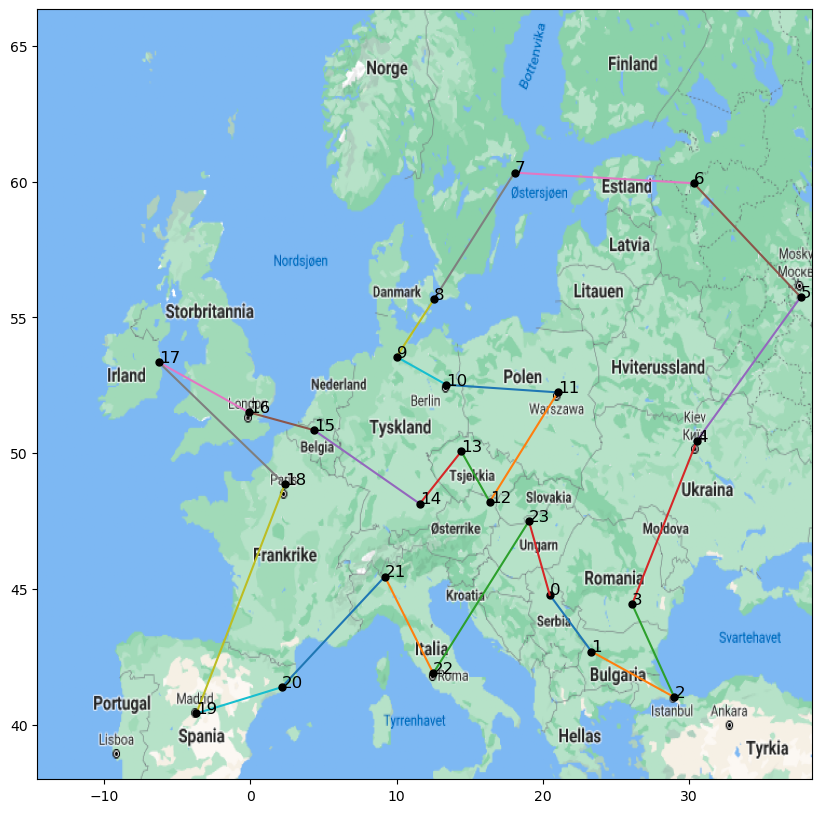

In [399]:
# Tests the hill climber on the first 6 cities.

test_hill_climber(cities_list, cities_dist, index_dict, 24)

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [ ]:
# Implement the algorithm here

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here